In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

C:\Users\Sony\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path =r"C:\Users\Sony\Desktop\JUPYTER NOTEBOOK\UDEMY\PERIAN DATA SCIENCE\RESOURCES USED IN COURSE\DATA\data_banknote_authentication.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


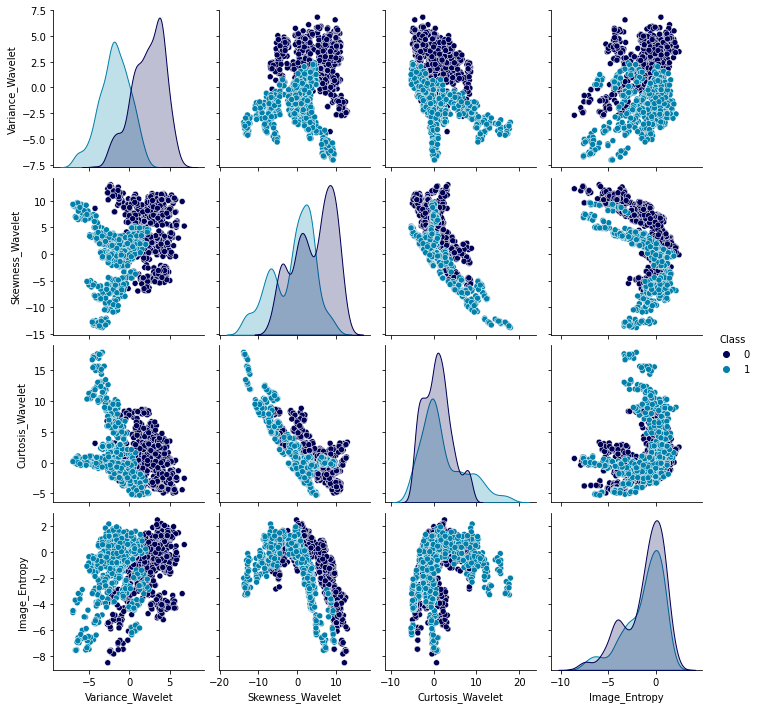

In [7]:
sns.pairplot(data , hue = "Class", palette = "ocean")

In [8]:
X = data.drop("Class" , axis = 1)

In [9]:
y = data["Class"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

Note:
    
since we are going to use grid search we are keeping our test data small(0.15)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
n_estimators = [64, 100, 128, 200]

In [16]:
max_features = [2,3,4]

In [17]:
bootstrap = [True , False]

In [18]:
oob_score = [True , False]

In [19]:
param_grid = {"n_estimators" : n_estimators,
             "max_features" : max_features,
             "bootstrap" : bootstrap,
             "oob_score" : oob_score}

In [20]:
rfc = RandomForestClassifier() 

In [21]:
grid = GridSearchCV(rfc , param_grid)

In [22]:
grid.fit(X_train , y_train)

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sony\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sony\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\User

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [23]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}

In [26]:
rfc = RandomForestClassifier(n_estimators= 100 , max_features = 2, bootstrap = True, oob_score = True)

In [27]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, oob_score=True)

In [28]:
y_pred = rfc.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


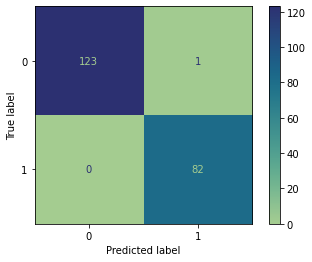

In [31]:
plot_confusion_matrix(rfc , X_test, y_test, cmap = "crest");

In [32]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       124
           1       0.99      1.00      0.99        82

    accuracy                           1.00       206
   macro avg       0.99      1.00      0.99       206
weighted avg       1.00      1.00      1.00       206



In [34]:
rfc.oob_score_   #good score

0.9948542024013722

In [35]:
from sklearn.metrics import accuracy_score

Now we have to find out whether increasing no of trees(n_estimoators) makes our RF model less prone to errror. So we need to visulalize this using a plot

In [36]:
error = []

missclassifications = []

for i in range(1 , 200):
    
    rfc = RandomForestClassifier(n_estimators= i)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test , preds)
    
    error.append(err)
    missclassifications.append(  np.sum(  y_test != preds )  )

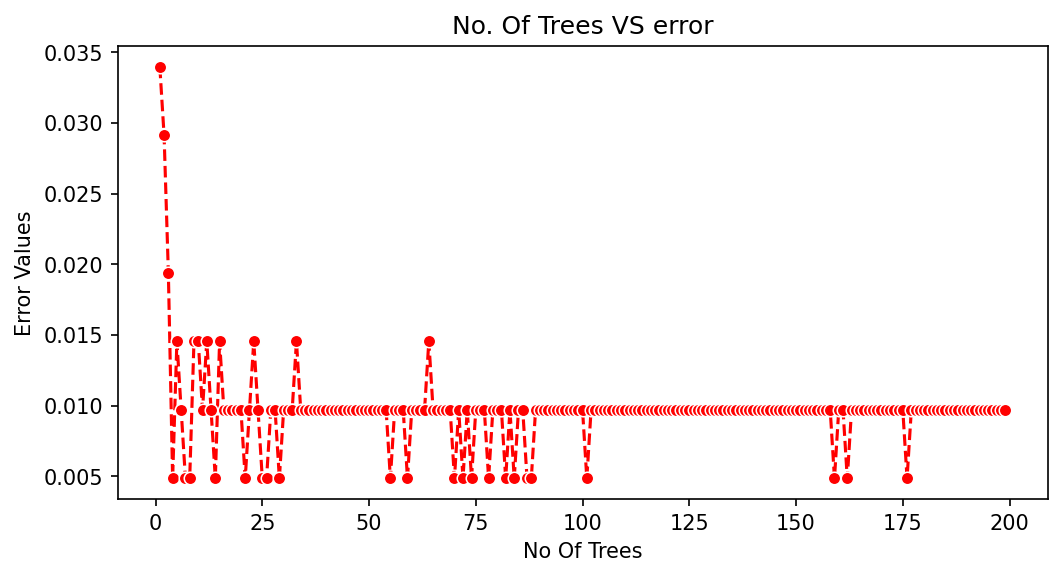

In [41]:
plt.figure(figsize = (8,4) , dpi = 150)

sns.lineplot(x = range(1,200) , y = error, linestyle = "--", marker = "o", color = "red" )

plt.title("No. Of Trees VS error")

plt.xlabel("No Of Trees")

plt.ylabel("Error Values");

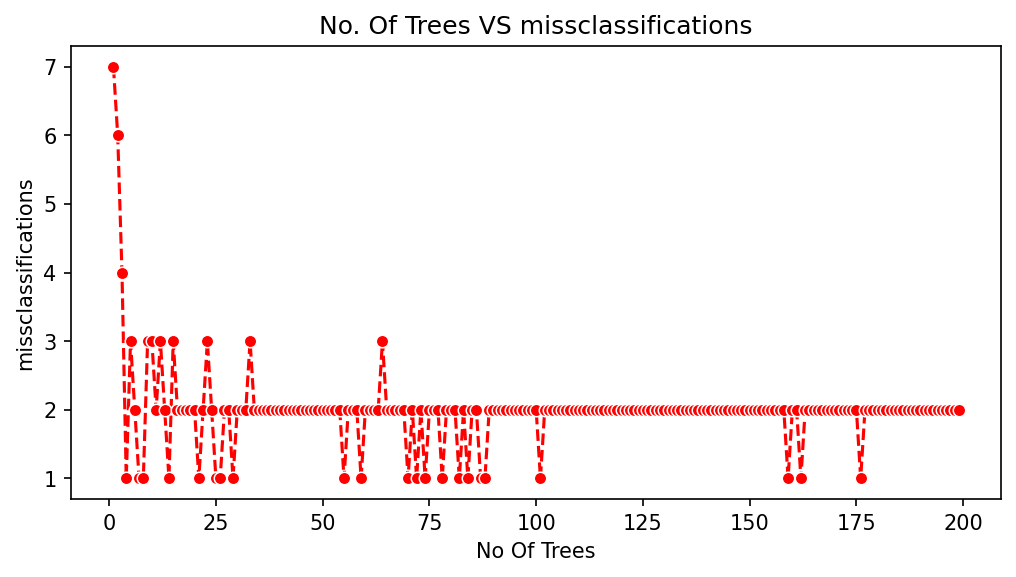

In [42]:
plt.figure(figsize = (8,4) , dpi = 150)

sns.lineplot(x = range(1,200) , y = missclassifications, linestyle = "--", marker = "o", color = "red" )

plt.title("No. Of Trees VS missclassifications")

plt.xlabel("No Of Trees")

plt.ylabel("missclassifications");